# Example 2
This notebook, associated to the configuration file *config_Example2.py* runs a 4Dvar-SW experiment to map SSH from idealized SSH data

## Configuration file

In [1]:
path_config = 'config_Example2.py'

In [2]:
import sys
sys.path.append('..')

In [3]:
from src import exp
config = exp.exp(path_config)

## State

In [4]:
from src import state as state
State = state.State(config)

## Model

In [5]:
from src import mod as mod
Model = mod.Model(config,State)

Model: SW1L
CFL: 5384.733183090409
time scheme: rk4
BC: 1d
Omegas: [0.00014544]
Thetas: [-1.57079633  0.          1.57079633]
Shape BC x: [1, 2, 2, 3, 6, 12]
Shape BC y: [1, 2, 2, 3, 6, 20]
tangent test:
adjoint test:


## Observations

In [6]:
from src import obs as obs
dict_obs = obs.obs(config,State)

* for sat nr :
 satellite : nr 
 kind : fullSSH 
 path : ../../data_Example2/data_BM-IT_idealized/ 
 name : obs
2010-05-03 21:00:00 : ../scratch/Example2/obs_20100503_21h00.nc
2010-05-07 00:00:00 : ../scratch/Example2/obs_20100507_00h00.nc
2010-05-10 03:00:00 : ../scratch/Example2/obs_20100510_03h00.nc
2010-05-13 06:00:00 : ../scratch/Example2/obs_20100513_06h00.nc


## Assimilation

In [7]:
from src import ana as ana
ana.ana(config,State,Model,dict_obs=dict_obs)


*** Obs op ***


*** Variational ***

checkpoint:
2010-05-01 00:00:00
2010-05-02 09:20:00
2010-05-03 18:40:00
2010-05-03 21:00:00: obs
2010-05-05 06:20:00
2010-05-06 15:40:00
2010-05-07 00:00:00: obs
2010-05-08 09:20:00
2010-05-09 18:40:00
2010-05-10 03:00:00: obs
2010-05-11 12:20:00
2010-05-12 21:40:00
2010-05-13 06:00:00: obs
2010-05-14 15:20:00
2010-05-15 00:00:00

*** Minimization ***

J0= 2.919809e+07
projg0 3.835369e+05

Is the minimization successful? False

Final cost function value: 29171811.514894877

Number of iterations: 3

*** Saving trajectory ***




## Visualize outputs

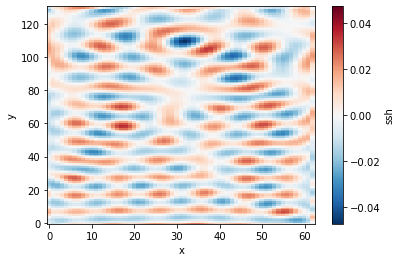

In [11]:
ds = State.load_output(config.final_date)
ds.ssh.plot()